# ISLP - Chapter 13 - Exercise 8
### Author: pzuehlke

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_1samp

We simulate the data as in the statement:

In [ ]:
rng = np.random.default_rng(1)
n, m = 20, 100
X = rng.normal(size =(n, m))

__8 (a):__ The histogram is presented below:

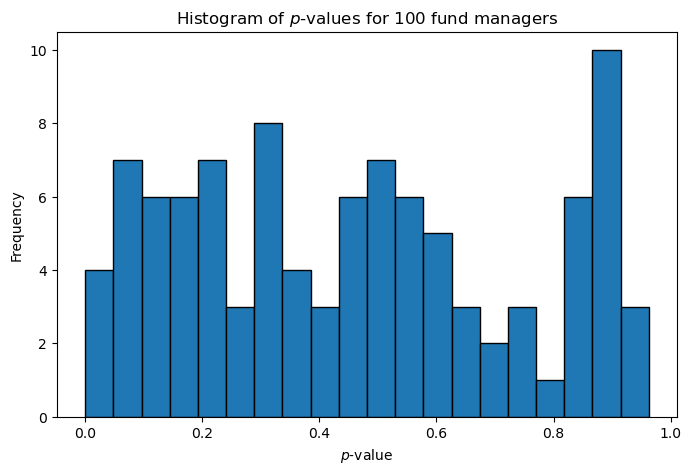

In [8]:
p_values = np.empty(m)
for i in range(m):
    p_values[i] = ttest_1samp(X[:, i], 0).pvalue

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(p_values, bins=20, edgecolor="black")
ax.set_xlabel("$ p $-value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of $ p $-values for $ {m} $ fund managers")
plt.show()

__8 (b):__ We just need to count for how many fund managers the $ p $-value was $ \le 0.05 $.
There are $ 4 $ in total. This can also be gleaned from the height of the
leftmost bin of the histogram.

In [13]:
print("Number of rejections with Type I error control at"
      f" alpha = 0.05 : {np.sum(p_values <= 0.05)}")

Number of rejections with Type I error control at alpha = 0.05 : 4


__8 (c):__ To control the Family-Wise Error Rate (FWER), we'll use the
Bonferroni correction method.

In [ ]:
reject_FWER, adj_p_values = multipletests(p_values, method="bonferroni", alpha=0.05)[:1]
rejections_fwer = np.sum(reject_FWER)
print(f"Number of rejections when controlling FWER at 0.05 (Bonferroni): {rejections_fwer}")

Number of rejections when controlling FWER at 0.05 (Bonferroni): 0


Let's create a histogram of the Bonferroni-adjusted $ p $-values as well:

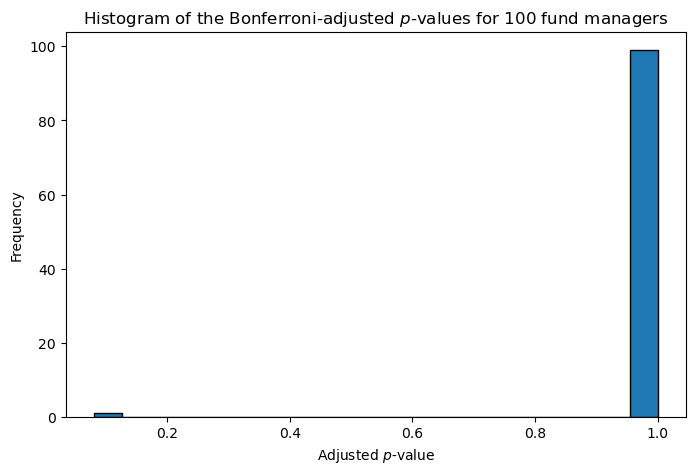

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(adj_p_values, bins=20, edgecolor="black")
ax.set_xlabel("Adjusted $ p $-value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of the Bonferroni-adjusted $ p $-values for $ {m} $ fund managers")
plt.show()

From the plot we see that almost all adjusted $ p $-values are equal to $ 1 $
and only a few or perhaps one of them seem to lie between $ 0.05 $ and $ 0.10 $.
Let's verify this more precisely:

In [28]:
counts, _ = np.histogram(adj_p_values, bins=20, range=(0, 1))
print(counts)

[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 99]


We conclude that after performing a Bonferroni correction, only one fund manager
achieved a mean excess return with an associated $ p $-value in the range $
[0.05, 0.1] $, while for all $ 99 $ others, the adjusted $ p $-values was equal
to $ 1.0 $.

__8 (d):__ Now let's control the False Discovery Rate (FDR) at $ 5\% $ using the
Benjamini-Hochberg procedure:

In [29]:
reject_bh, q_values = multipletests(p_values, method="fdr_bh", alpha=0.05)[:2]
rejections_fdr = np.sum(reject_bh)
print(f"Number of rejections when controlling FDR at 0.05 (Benjamini-Hochberg): {rejections_fdr}")

Number of rejections when controlling FDR at 0.05 (Benjamini-Hochberg): 0


Let's plot the $ q $-values to get a better idea of why no null hypothesis was rejected.

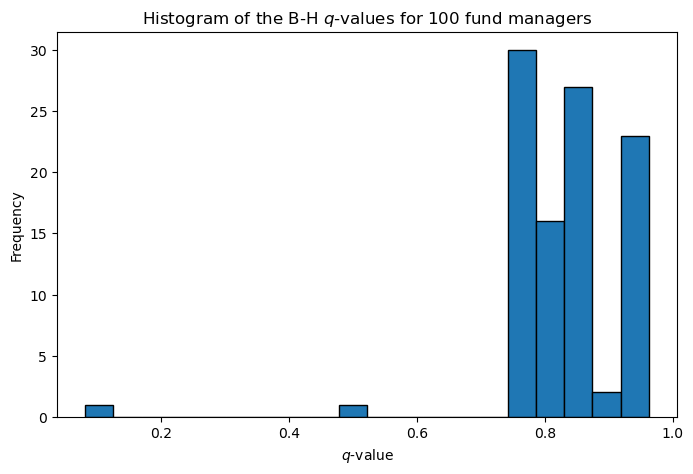

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(q_values, bins=20, edgecolor="black")
ax.set_xlabel("$ q $-value")
ax.set_ylabel("Frequency")
ax.set_title(f"Histogram of the B-H $ q $-values for $ {m} $ fund managers")
plt.show()

Here's the precise distribution of the $ q $-values:

In [33]:
counts, _ = np.histogram(q_values, bins=20, range=(0, 1))
print(counts)

[ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 31 38  4 24  1]


__8 (e):__ We just need to sort the $ p $-values (the smallest $ p $-values
correspond to the best performances) to get the top $ 10 $ fund managers, and
then repeat the code in items (c) and (d):

In [35]:
cherry_picked_p_values = np.sort(p_values)[:10]

# Control FWER for just these 10 fund managers:
reject_cp_bonferroni = multipletests(cherry_picked_p_values, method="bonferroni", alpha=0.05)[:1]
rejections_cp_fwer = np.sum(reject_cp_bonferroni)

# Control FDR for just these 10 fund managers:
reject_cp_bh = multipletests(cherry_picked_p_values, method="fdr_bh", alpha=0.05)[:1]
rejections_cp_fdr = np.sum(reject_cp_bh)

print(f"Number of rejections among cherry-picked managers with FWER control: {rejections_cp_fwer}")
print(f"Number of rejections among cherry-picked managers with FDR control: {rejections_cp_fdr}")

Number of rejections among cherry-picked managers with FWER control: 1
Number of rejections among cherry-picked managers with FDR control: 2


__8 (f):__ The cherry-picking approach in part (e) is misleading because we're
already conditioning on observing extreme test statistics.  The $ p $-values of
these cherry-picked managers no longer follow the uniform distribution under the
null. Furthermore, the standard multiple testing procedures (FWER and FDR)
assume that all tests are considered together.

When we cherry-pick, we're effectively performing a hidden first round of
testing, and then applying corrections only to the selected tests. This approach
will lead to an inflated number of false discoveries since the selection process
itself is not accounted for in the corrections.